In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv(r'C:\Users\60250\Desktop\advanced machine learning\project\transfusion.data')
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
data.rename(columns={'Recency (months)':'R','Frequency (times)':'F','Monetary (c.c. blood)':'M','Time (months)':'T','whether he/she donated blood in March 2007':'whether'}, inplace=True)
data

,R,F,M,T,whether
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [4]:
#Analysis of the dataset
#1.The type of data
data_types=data.dtypes
print("The type of data\n",data_types)

#2.The missing values
#Is there a missing value in the column
data_missing_column=data.isnull().any()
print("Is there a missing value in the column:\n",data_missing_column)

# Find rows with missing values
nan_lines = data.isnull().any(1)

# Count how many rows have missing values
nan_lines_sum=nan_lines.sum()
print("Find rows with missing values:\n",nan_lines)
print("Count how many rows have missing values :",nan_lines_sum)
#Delete rows with null values in the data table



The type of data
 R          int64
F          int64
M          int64
T          int64
whether    int64
dtype: object
Is there a missing value in the column:
 R          False
F          False
M          False
T          False
whether    False
dtype: bool
Find rows with missing values:
 0      False
1      False
2      False
3      False
4      False
       ...  
743    False
744    False
745    False
746    False
747    False
Length: 748, dtype: bool
Count how many rows have missing values : 0


In [5]:
#Calculate covariance, correlation coefficient using pandas
# Use DataFrame as the data structure. To facilitate calculation, we will transpose the matrix
dffm = pd.DataFrame(data, columns=['F', 'M'])
cov_F_M=dffm.F.cov(dffm.M)
print("F,M column covariance:",cov_F_M)

corr_F_M=dffm.F.corr(dffm.M)
print("Correlation coefficients of columns F and M:",corr_F_M)

dfft = pd.DataFrame(data,columns=['F', 'T'])
cov_F_T=dfft.F.cov(dfft.T)
print("F,T column covariance:",cov_F_T)

corr_F_T=dfft.F.corr(dfft.T)
print("Correlation coefficients of columns F and T:",corr_F_T)

dfmt = pd.DataFrame(data,columns=['M', 'T'])
cov_M_T=dfmt.M.cov(dfft.T)
print("M,T column covariance:",cov_M_T)

corr_M_T=dfmt.M.corr(dfft.T)
print("Correlation coefficients of columns M and T:",corr_M_T)


F,M column covariance: 8524.376919442475
Correlation coefficients of columns F and M: 1.0
F,T column covariance: nan
Correlation coefficients of columns F and T: nan
M,T column covariance: nan
Correlation coefficients of columns M and T: nan


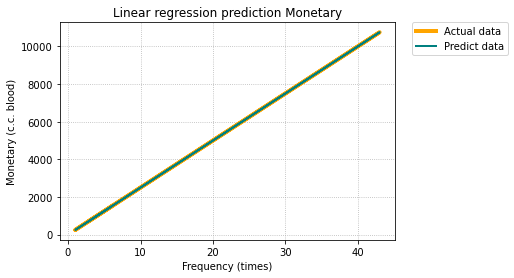

In [6]:
#Prediction 
#Due to the above correlation,we can predict
x = data[['F']]
y = data['M']
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
pred_y=model.predict(X_test)


plt.subplot(1,1,1)
plt.plot(X_test, y_test, color='orange', linewidth=4, label='Actual data')
plt.plot(X_test, pred_y, color='teal', linewidth=2, label='Predict data')
plt.title('Linear regression prediction Monetary')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0)
plt.xlabel('Frequency (times)')
plt.ylabel('Monetary (c.c. blood)')
plt.grid(b=True, ls=':')
plt.show()

In [7]:
#K-Nearest Neighbours (K-NN) predict whether he/she donated blood in March 2007
from sklearn import preprocessing
import sklearn.model_selection as cross_validation 
from sklearn.neighbors import KNeighborsClassifier

X =data.iloc[:,:4]
Y =data[['whether']]
X.head()

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled =min_max_scaler.fit_transform(X)
X_scaled[1:5]

#Dividing training and test sets
train_data,test_data, train_target, test_target = cross_validation.train_test_split(
X_scaled, Y, test_size=0.3, train_size=0.7,random_state=123)

# Modeling
model =KNeighborsClassifier(n_neighbors=3)  # Default Euclidean distance
model.fit(train_data,train_target.values.flatten())
test_est =model.predict(test_data)
print(test_target)

test_target['prediction']=test_est
test_target=test_target.reset_index(drop=True)
print(test_target)


     whether
138        0
511        0
427        0
161        0
307        0
..       ...
593        1
450        0
155        0
75         1
280        0

[225 rows x 1 columns]
     whether  prediction
0          0           1
1          0           0
2          0           0
3          0           0
4          0           0
..       ...         ...
220        1           0
221        0           0
222        0           0
223        1           0
224        0           1

[225 rows x 2 columns]


<ipython-input-7-f837767e0efd>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_target['prediction']=test_est


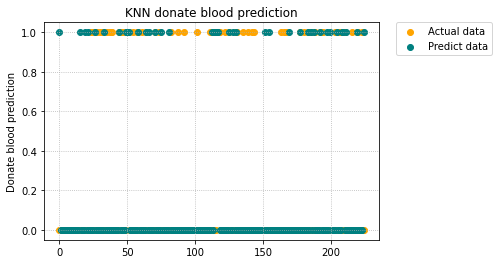

In [8]:
plt.subplot(1,1,1)
plt.scatter(test_target.index,test_target.whether, color='orange', label='Actual data')
plt.scatter(test_target.index,test_target.prediction, color='teal', label='Predict data')
plt.title('KNN donate blood prediction')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0)

plt.xlabel('')
plt.ylabel('Donate blood prediction')

plt.grid(b=True, ls=':')
plt.show()

In [9]:
# Model evaluation

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

print(metrics.confusion_matrix(test_target['whether'],test_est, labels=[0, 1]))  # Confusion matrix

print(metrics.classification_report(test_target['whether'],test_est))

[[143  22]
 [ 42  18]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       165
           1       0.45      0.30      0.36        60

    accuracy                           0.72       225
   macro avg       0.61      0.58      0.59       225
weighted avg       0.69      0.72      0.70       225



88 means predict data is 1, actual data is 1.

24 means predict data is 1, actual data is 0.

22 means predict data is 0, actual data is 1.

16 means predict data is 0, actual data is 0.